<a href="https://colab.research.google.com/github/bksat90/TransferLearning/blob/main/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# basic imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [ ]:
# tensorflow imports
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Input, Dense, Flatten
from tensorflow.keras.applications.vgg16 import VGG16  as PretrainedModel
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
# load CIFAR 10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [ ]:
# assert the shape of dataset
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

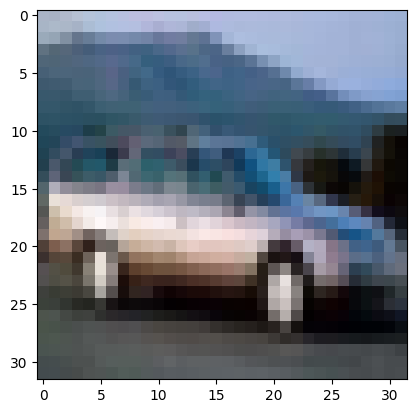

In [ ]:
# display the sample image from the training data set
plt.imshow(x_train[4])
plt.show()

In [ ]:
# display the sample output (classification of the class) from the
# training data set
print(y_train[4])

[1]


In [ ]:
IMG_SIZE = [32, 32]

In [ ]:
ptm = PretrainedModel(
    input_shape=IMG_SIZE + [3],
    weights='imagenet',
    include_top=False)

58889256/58889256 [==============================] - 0s 0us/step


In [ ]:
## map the data into feature vectors

# number of classes
K = 10
x = Flatten()(ptm.output)
# softmax is used for classification
x1 = Dense(K, activation='softmax')(x)

In [ ]:
# create a model
model = Model(inputs=ptm.input, outputs=x1)

In [ ]:
# freeze pretrained model weights
ptm.trainable = False

In [ ]:
# display the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
# create an instance of ImageDataGenerator
train_datagen = ImageDataGenerator(
  horizontal_flip=True
  ,preprocessing_function=preprocess_input
)

In [ ]:
BATCH_SIZE = 32

In [ ]:
train_datagen.fit(x_train)
train_generator = train_datagen.flow(x_train,
                                     y_train,
                                     batch_size=BATCH_SIZE)

In [ ]:
valid_datagen = ImageDataGenerator(preprocessing_function=preprocess_input
                                   )
valid_datagen.fit(x_test)
valid_generator = valid_datagen.flow(x_test,
                                     y_test,
                                     batch_size=BATCH_SIZE)

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# fit the model
r = model.fit_generator(
  train_generator,
  validation_data=valid_generator,
  epochs=20,
  steps_per_epoch=(x_train.shape[0]//BATCH_SIZE),
  validation_steps=(x_test.shape[0]//BATCH_SIZE)
)

Epoch 1/20
  1/195 [..............................] - ETA: 11s - loss: 1065.6348 - accuracy: 0.0469

<ipython-input-20-76bca985ae43>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


195/195 [==============================] - 7s 34ms/step - loss: 1083.4747 - accuracy: 0.0501 - val_loss: 1084.9131 - val_accuracy: 0.0516
Epoch 2/20
194/195 [============================>.] - ETA: 0s - loss: 1081.8757 - accuracy: 0.0500

KeyboardInterrupt: 